In [8]:
import os
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents import AgentType
from langchain_google_genai import ChatGoogleGenerativeAI
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load environment variables
from dotenv import load_dotenv
import os

# Load environment variables and set Google Gemini API key
load_dotenv()
os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

# Set a random seed for reproducibility
np.random.seed(42)

In [9]:
# Generate sample data
n_rows = 1000

# Generate dates
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(n_rows)]

# Define data categories
makes = ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan', 'BMW', 'Mercedes', 'Audi', 'Hyundai', 'Kia']
models = ['Sedan', 'SUV', 'Truck', 'Hatchback', 'Coupe', 'Van']
colors = ['Red', 'Blue', 'Black', 'White', 'Silver', 'Gray', 'Green']

# Create the dataset
data = {
    'Date': dates,
    'Make': np.random.choice(makes, n_rows),
    'Model': np.random.choice(models, n_rows),
    'Color': np.random.choice(colors, n_rows),
    'Year': np.random.randint(2015, 2023, n_rows),
    'Price': np.random.uniform(20000, 80000, n_rows).round(2),
    'Mileage': np.random.uniform(0, 100000, n_rows).round(0),
    'EngineSize': np.random.choice([1.6, 2.0, 2.5, 3.0, 3.5, 4.0], n_rows),
    'FuelEfficiency': np.random.uniform(20, 40, n_rows).round(1),
    'SalesPerson': np.random.choice(['Alice', 'Bob', 'Charlie', 'David', 'Eva'], n_rows)
}

# Create DataFrame and sort by date
df = pd.DataFrame(data).sort_values('Date')

# Display sample data and statistics
print("\nFirst few rows of the generated data:")
print(df.head())

print("\nDataFrame info:")
df.info()

print("\nSummary statistics:")
print(df.describe())


First few rows of the generated data:
        Date       Make      Model  Color  Year     Price  Mileage  \
0 2022-01-01   Mercedes      Sedan  Green  2022  57952.65   5522.0   
1 2022-01-02  Chevrolet  Hatchback    Red  2021  58668.22  94238.0   
2 2022-01-03       Audi      Truck  White  2019  69187.87   7482.0   
3 2022-01-04     Nissan  Hatchback  Black  2016  40004.44  43846.0   
4 2022-01-05   Mercedes  Hatchback    Red  2016  63983.07  52988.0   

   EngineSize  FuelEfficiency SalesPerson  
0         2.0            24.7       Alice  
1         1.6            26.2         Bob  
2         2.0            28.0       David  
3         3.5            24.8       David  
4         2.5            24.1       Alice  

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1000 non-null   datetime64[n

In [20]:
# Create the Pandas DataFrame agent
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", google_api_key=os.environ["GOOGLE_API_KEY"])

# NOTE: Set default agent_type => https://blog.stackademic.com/unveiling-insights-exploring-langchains-pandas-dataframe-agent-with-gemini-pro-5448487e21e2
agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True,
    # agent_type=AgentType.OPENAI_FUNCTIONS, 
)
print("Data Analysis Agent is ready. You can now ask questions about the data.")

Data Analysis Agent is ready. You can now ask questions about the data.


In [21]:
def ask_agent(question):
    """Function to ask questions to the agent and display the response"""
    response = agent.run({
        "input": question,
        "agent_scratchpad": f"Human: {question}\nAI: To answer this question, I need to use Python to analyze the dataframe. I'll use the python_repl_ast tool.\n\nAction: python_repl_ast\nAction Input: ",
    })
    print(f"Question: {question}")
    print(f"Answer: {response}")
    print("---")

In [22]:
# Example questions
ask_agent("What are the column names in this dataset?")
ask_agent("How many rows are in this dataset?")
ask_agent("What is the average price of cars sold?")



> Entering new AgentExecutor chain...
Thought: I need to extract the column names from the dataframe.
Action: python_repl_ast
Action Input: print(df.columns)Index(['Date', 'Make', 'Model', 'Color', 'Year', 'Price', 'Mileage',
       'EngineSize', 'FuelEfficiency', 'SalesPerson'],
      dtype='object')
I now know the column names.
Final Answer: Date, Make, Model, Color, Year, Price, Mileage, EngineSize, FuelEfficiency, SalesPerson

> Finished chain.
Question: What are the column names in this dataset?
Answer: Date, Make, Model, Color, Year, Price, Mileage, EngineSize, FuelEfficiency, SalesPerson
---


> Entering new AgentExecutor chain...
Thought: I need to find the number of rows in the dataframe `df`. I can use the `len()` function to determine this.
Action: python_repl_ast
Action Input: len(df)1000I now know the final answer
Final Answer: 1000

> Finished chain.
Question: How many rows are in this dataset?
Answer: 1000
---


> Entering new AgentExecutor chain...
Thought: I need to 



> Entering new AgentExecutor chain...
Thought: I need to generate a histogram of the 'Price' column in the dataframe. I can use the `hist()` method of the pandas Series object.
Action: python_repl_ast
Action Input: `df['Price'].hist()`Axes(0.125,0.11;0.775x0.77)I have successfully generated the histogram.
Final Answer: The histogram of the 'Price' column has been generated.

> Finished chain.
Question: Could you visualize the distribution of price using a histogram
Answer: The histogram of the 'Price' column has been generated.
---


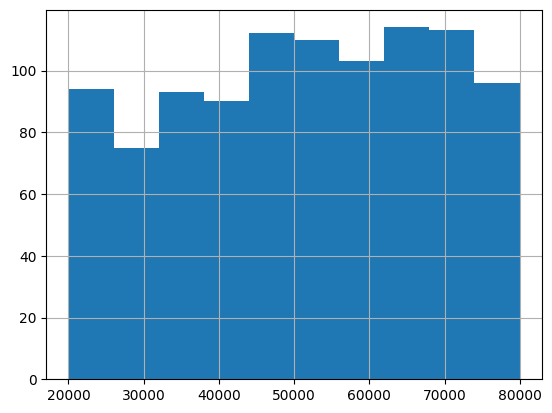

In [24]:
ask_agent("Could you visualize the distribution of price using a histogram")